# Algorithm Performance Data Analysis - Consolidation 3

In [2]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## Run4 
data = pd.read_csv('IndividualCompressionData_since_test_20231102_201052.csv')

In [3]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_201052,10404007.png,502730,27377,475353,0.945543,15,13,0,0,0,0.0,24.980919,3241.644400,13.023150,120,0.000060
1,2,test_20231102_201052,1254659.png,342646,84372,258274,0.753763,4,7,0,0,0,0.0,19.952688,2913.615216,13.486482,120,0.000060
2,3,test_20231102_201052,10188041.png,221231,11047,210184,0.950066,2,4,0,0,0,0.0,10.226011,952.977829,18.339976,120,0.000060
3,4,test_20231102_201052,10287332.png,216980,13912,203068,0.935883,2,4,0,0,0,0.0,9.119531,704.396043,19.652635,120,0.000060
4,5,test_20231102_201052,11610969.png,368720,31817,336903,0.913710,3,3,0,0,0,0.0,18.978633,2421.380016,14.290174,120,0.000060
5,6,test_20231102_201052,10350842.png,212614,7712,204902,0.963728,1,3,0,0,0,0.0,16.956055,1855.620101,15.445913,120,0.000060
6,7,test_20231102_201052,10863862.png,317432,15377,302055,0.951558,2,3,0,0,0,0.0,23.047131,3065.621008,13.265619,120,0.000060
7,8,test_20231102_201052,11382381.png,312486,1432,311054,0.995417,2,5,0,0,0,0.0,18.314965,1924.642379,15.287303,120,0.000060
8,9,test_20231102_201052,11079715.png,443815,132247,311568,0.702022,4,4,0,0,0,0.0,16.302612,1952.235056,15.225483,120,0.000060
9,10,test_20231102_201052,11551286.png,271883,1602,270281,0.994108,1,4,0,0,0,0.0,15.576857,1453.958336,16.505284,120,0.000060


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_201052,10404007.png,502730,27377,475353,0.945543,15,13,0,0,0,0.0,24.980919,3241.644400,13.023150,120,0.000060
10,1,test_20231102_201053,10404007.png,502730,26112,476618,0.948060,3,4,0,0,0,0.0,25.063852,3263.948144,12.993371,121,0.000150
20,1,test_20231102_201053,10404007.png,502730,294717,208013,0.413767,7,5,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000045
30,1,test_20231102_201054,10404007.png,502730,211432,291298,0.579432,4,4,0,0,0,0.0,18.152636,1711.372544,15.797358,70,0.000090


In [6]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [7]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_23346/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [8]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_201052,120,0.000060,5.5,321053.7,32689.5,288364.2,0.910580,3.6,5.0,0.0,0.0,0.0,0.0,17.345540,2048.609038,15.452202
1,test_20231102_201053,60,0.000045,5.5,321053.7,131891.9,189161.8,0.641961,3.4,4.2,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
2,test_20231102_201053,121,0.000150,5.5,321053.7,31804.9,289248.8,0.913062,2.5,3.8,0.0,0.0,0.0,0.0,17.669658,2113.030005,15.313270
3,test_20231102_201054,70,0.000090,5.5,321053.7,103406.2,217647.5,0.719183,3.5,4.3,0.0,0.0,0.0,0.0,10.986970,818.096697,19.383785


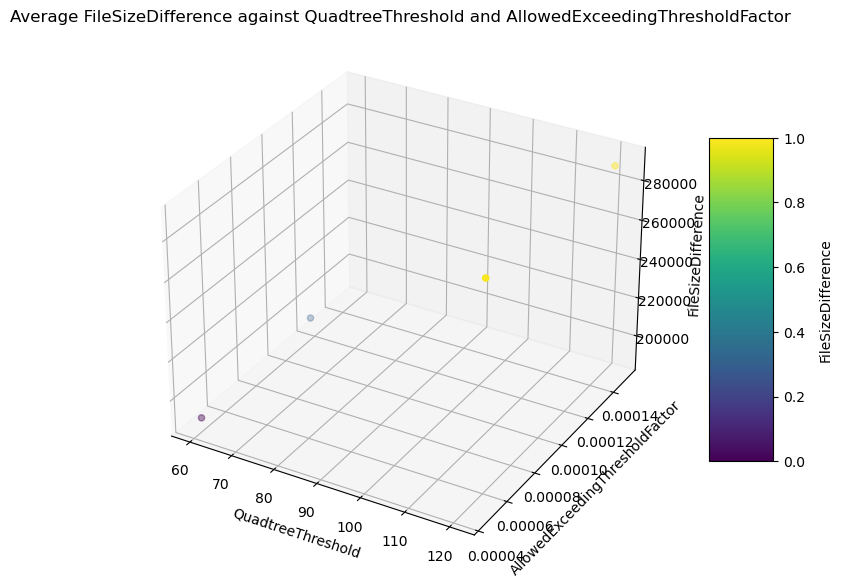

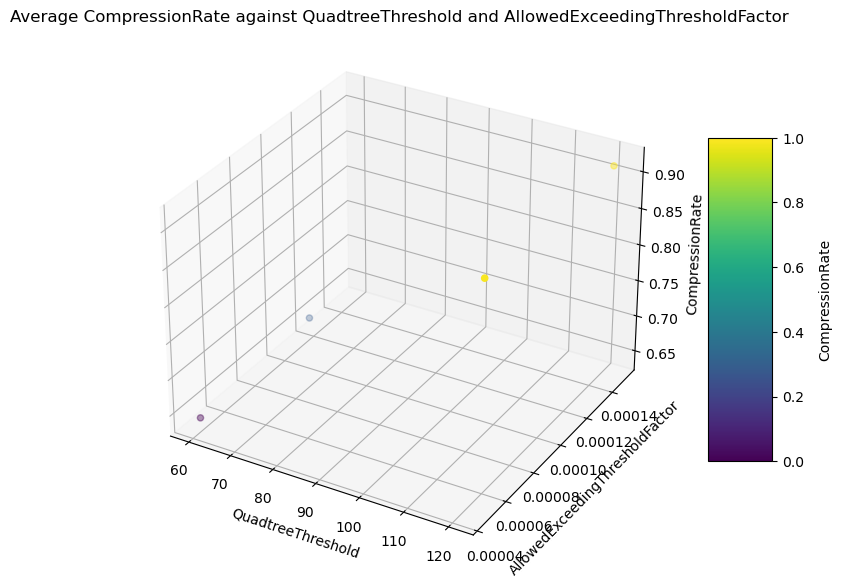

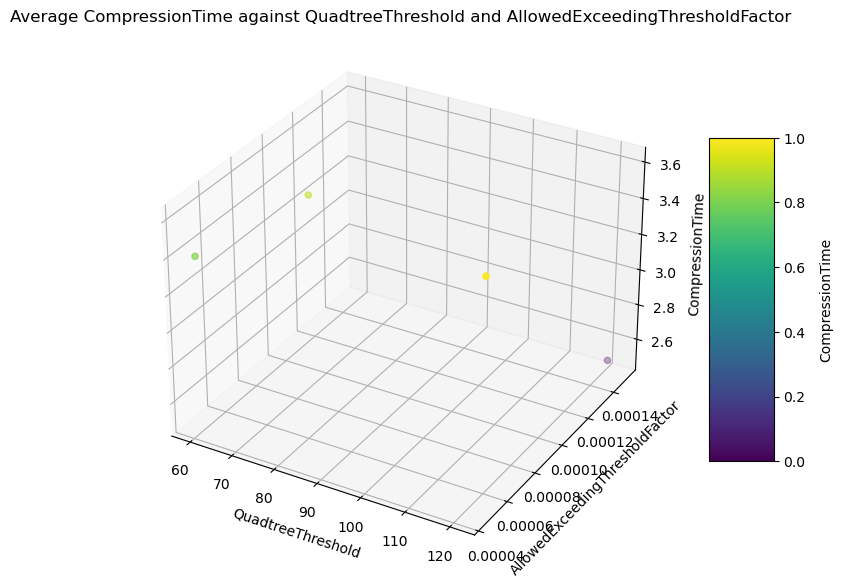

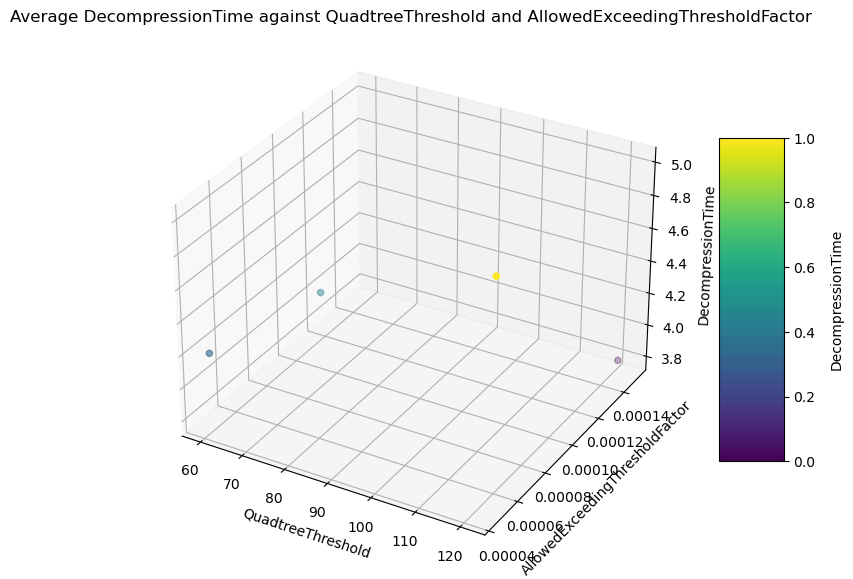

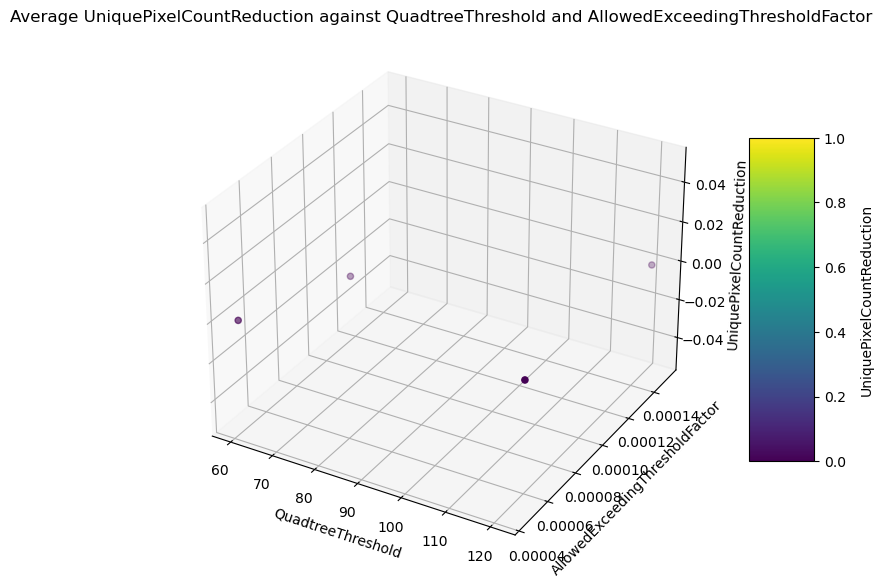

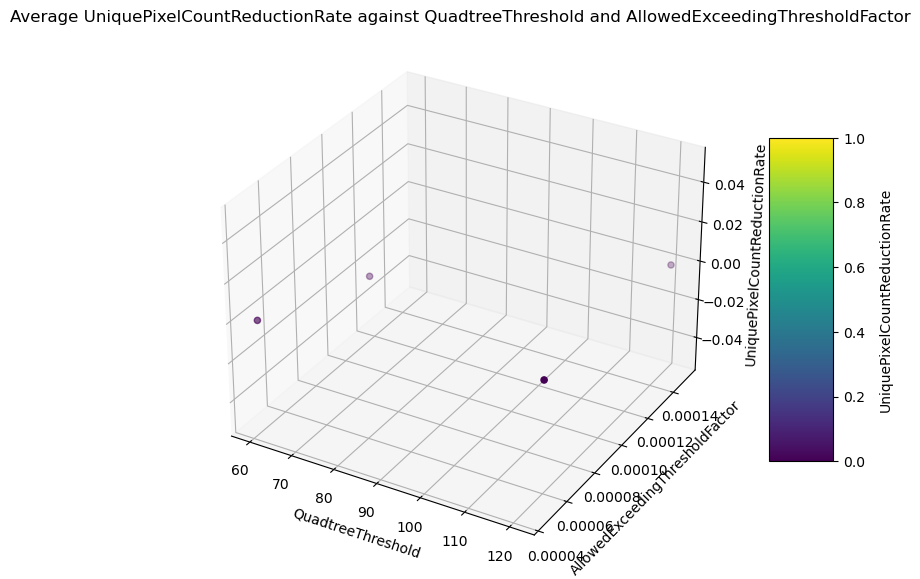

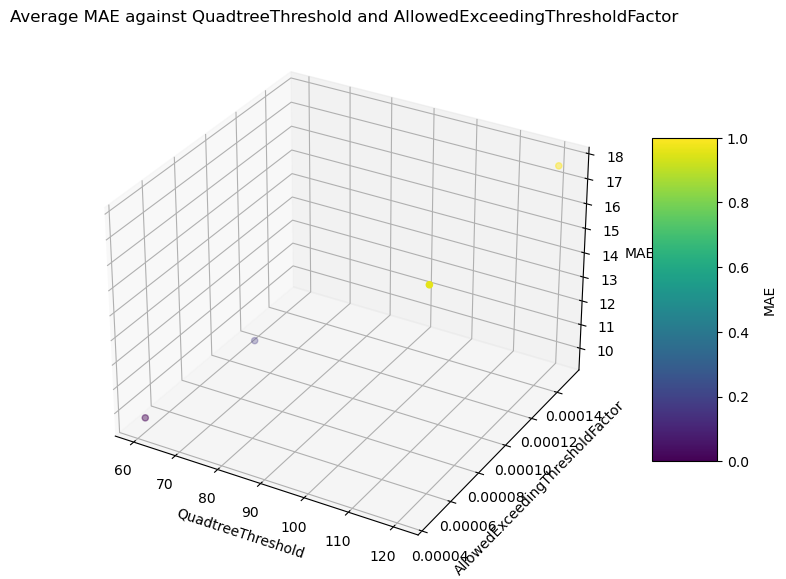

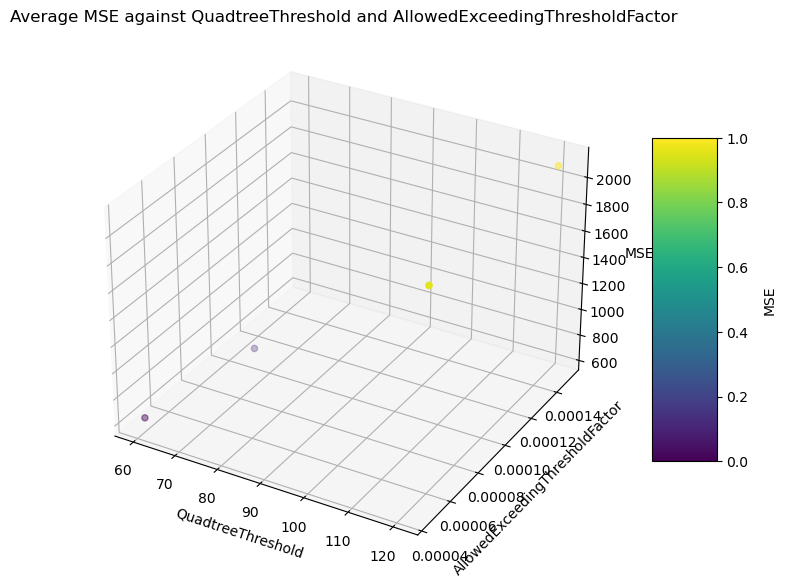

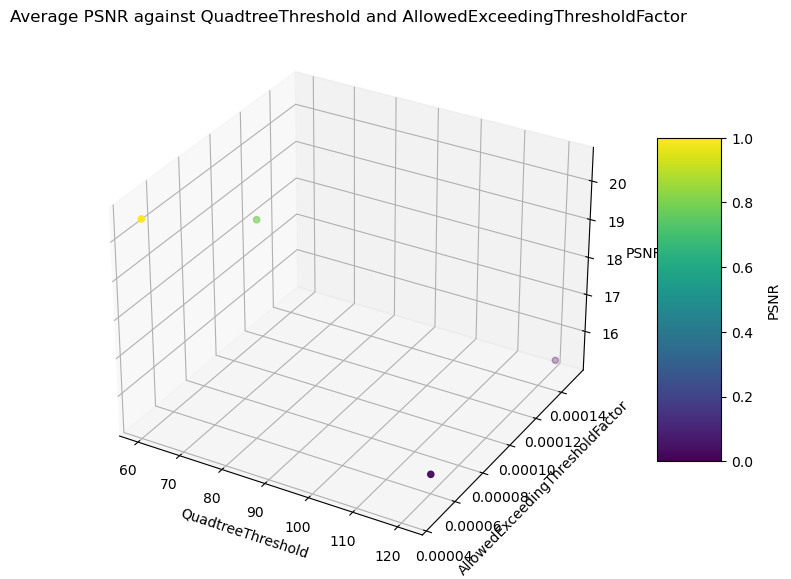

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


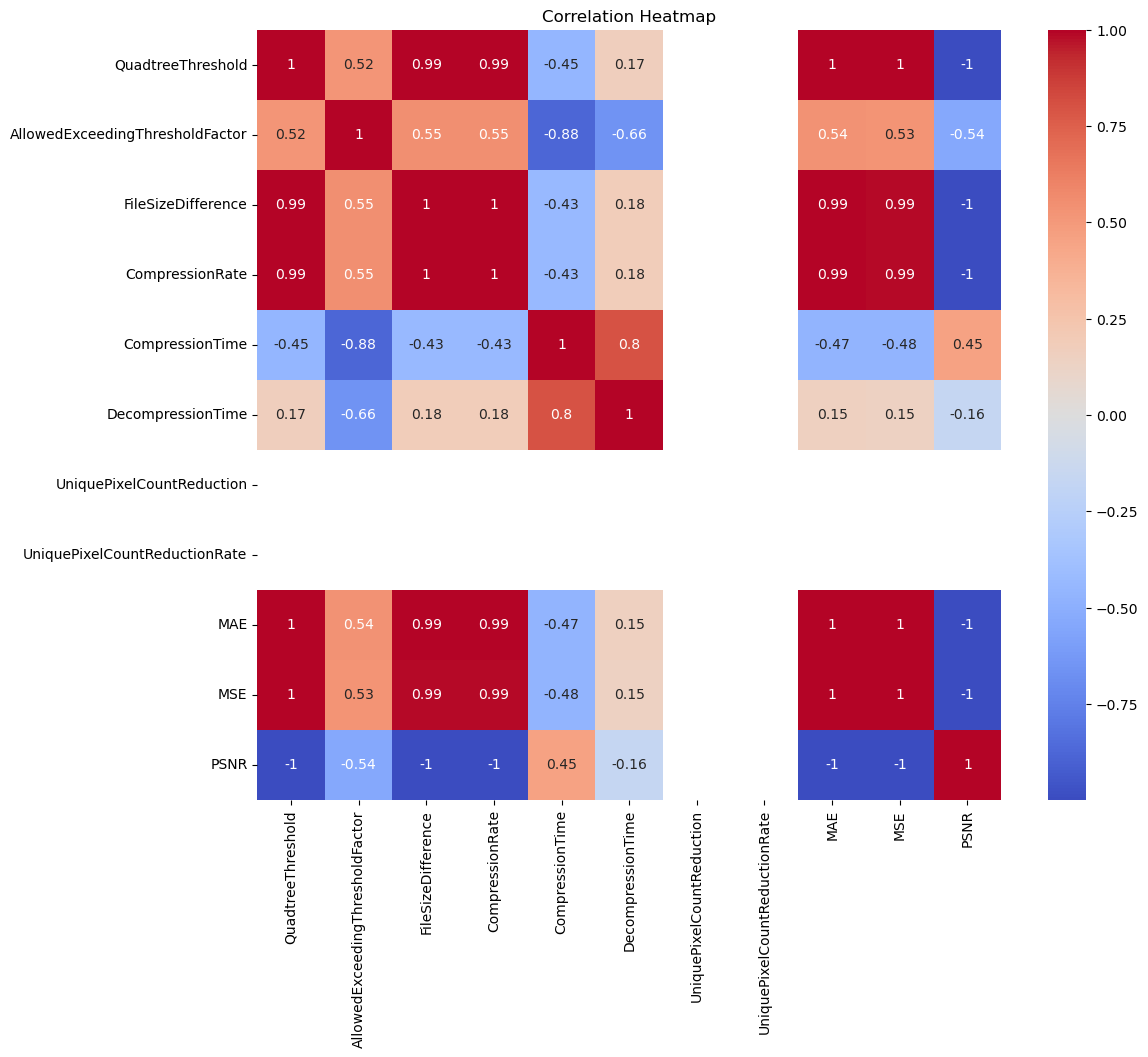

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [11]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

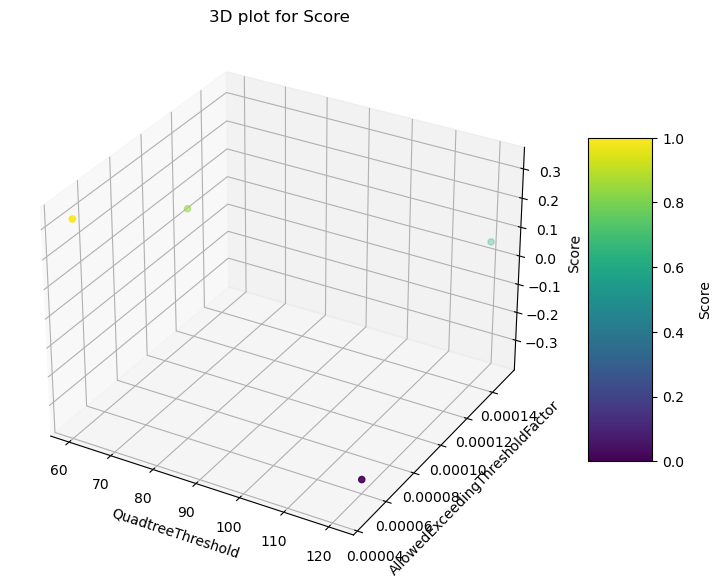

In [12]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

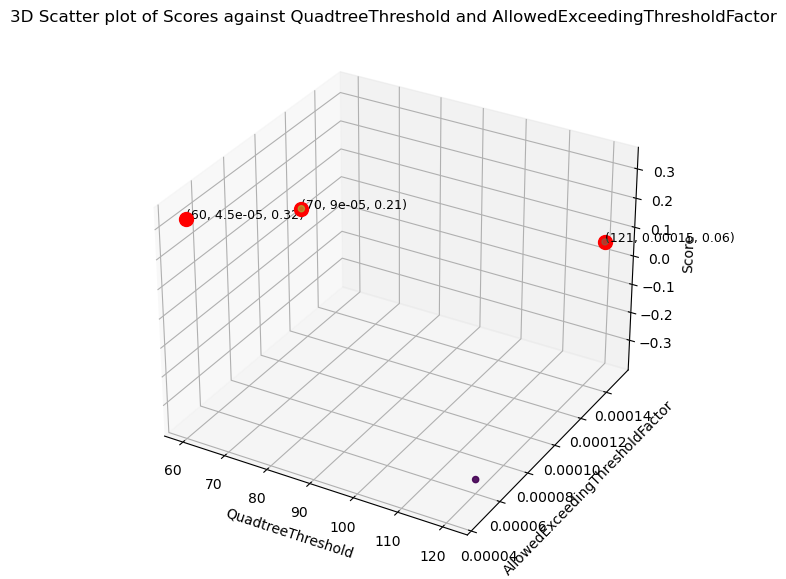

In [13]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [14]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


   QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
1                 60                         0.000045  0.322975
3                 70                         0.000090  0.214893
2                121                         0.000150  0.062812
